<a href="https://colab.research.google.com/github/aayushh04/dlt/blob/main/week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - loss: 0.0799 - val_loss: 0.0416
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0386 - val_loss: 0.0276
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0262 - val_loss: 0.0209
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0204 - val_loss: 0.0175
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0172 - val_loss: 0.0159
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0152 - val_loss: 0.0138
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0137 - val_loss: 0.0135
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0127 - val_loss: 0.0115
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0123 - val_loss: 0.0110
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0113 - val_loss: 0.0112
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0108 - val_l

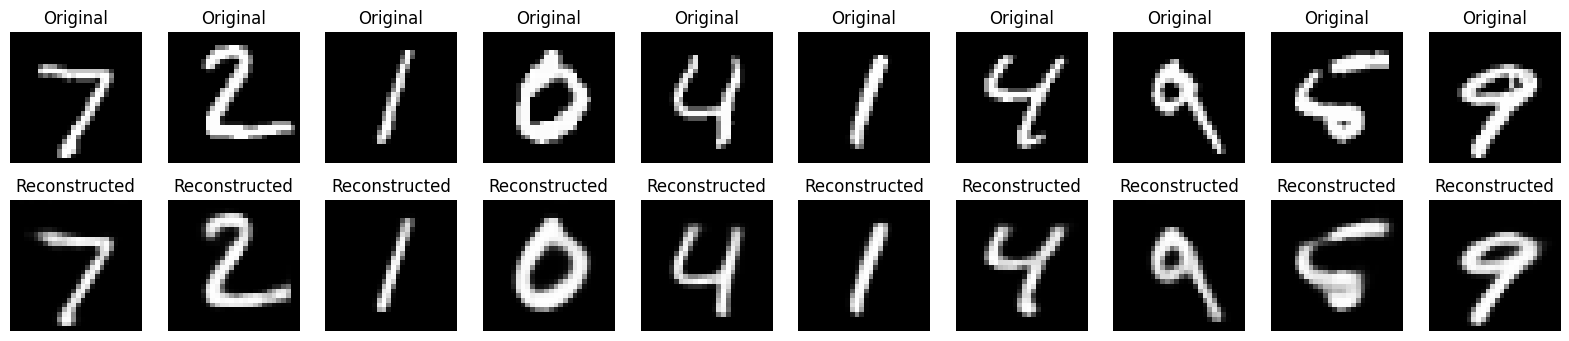

Original shape: (28, 28)
Compressed representation shape: (64,)


In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector
from tensorflow.keras.optimizers import Adam

# Load and preprocess MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize to [0,1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Treat each image as a sequence of 28 timesteps, each of length 28
timesteps = 28
input_dim = 28
latent_dim = 64  # Dimension of compressed representation

# Define encoder
inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(128, activation='relu', return_sequences=True)(inputs)
encoded = LSTM(latent_dim, activation='relu', return_sequences=False)(encoded)

# Define decoder
decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(128, activation='relu', return_sequences=True)(decoded)
decoded = LSTM(input_dim, activation='sigmoid', return_sequences=True)(decoded)

# Build autoencoder model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Build encoder model for compression
encoder = Model(inputs, encoded)

# Train the model
autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    validation_data=(x_test, x_test),
    shuffle=True
)

# Compress and reconstruct test images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i], cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

# Display shape of compressed features
print("Original shape:", x_test[0].shape)
print("Compressed representation shape:", encoded_imgs[0].shape)
